In [33]:
import pandas as pd
import seaborn as sb
import pylab as py
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from folium import plugins
from geopy.geocoders import Nominatim
import datetime
import statsmodels.stats as st
import statsmodels.api as sm
import scipy.stats as sp
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [2]:
df = pd.read_csv('microplastics-in-ocean.csv')
df.head()

,Year,Accumulated ocean plastic: Microplastics (<0.5cm),Yearly Microplastics Emission
0,1950,0,0
1,1951,0,0
2,1952,0,0
3,1953,0,0
4,1954,100,100


In [3]:
# df.describe()
# df.isnull().any()

In [4]:
df = df.loc[(df['Year'] >= 1974) & (df['Year'] <= 2004)]
df.insert(0, 'Time', range(1, 1 + len(df)))
df = df.drop(["Accumulated ocean plastic: Microplastics (<0.5cm)"], axis = 1)
df.head()

,Time,Year,Yearly Microplastics Emission
24,1,1974,1400
25,2,1975,1500
26,3,1976,1800
27,4,1977,2000
28,5,1978,2200


In [5]:
df_female = pd.read_csv("female-pop.csv")
df_female = df_female.groupby("Year").sum()
df_female = df_female.reset_index()
df_female = df_female.loc[(df_female['Year'] >= 1980) & (df_female['Year'] <= 2010)]
df_female = df_female.reset_index()
df_female = df_female.drop(columns = ["index"])
df_female.head()

,Year,PopFemale
0,1980,8.682137e+07
1,1981,8.839908e+07
2,1982,9.000685e+07
3,1983,9.165150e+07
4,1984,9.334087e+07


In [6]:
df_cancer = pd.read_csv('cancer2.csv')
df_cancer = df_cancer.loc[(df_cancer['Year'] >= 1980) & (df_cancer['Year'] <= 2010)]
df_cancer['Cancer Rate'] = df_cancer.sum(axis=1) - df_cancer["Year"]
df_cancer = df_cancer.reset_index()
df_cancer = df_cancer.drop(columns = ["index"])
df_cancer = pd.concat([df_cancer['Year'], df_cancer['Cancer Rate']], axis = 1)
# df_cancer["Cancer Rate"] = df_cancer["Cancer Rate"]/ df_female["PopFemale"] *100
df_cancer["Cancer Rate"] = df_cancer["Cancer Rate"] * 0.3
df_cancer.head()

,Year,Cancer Rate
0,1980,73683.6
1,1981,75705.9
2,1982,85086.6
3,1983,104991.0
4,1984,107164.2


In [7]:
len(df_cancer)

31

In [8]:
X = df
# X = X.reset_index().drop(columns = ["index","Year"])
X = X.reset_index().drop(columns = ["index","Year","Time"])

y = df_cancer['Cancer Rate']
y = y.reset_index().drop(columns = "index")
y = y.astype(float)

# Define the modell
X = sm.add_constant(X)
model = sm.OLS(y, X)

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())
# print(model_fit.rsquared)
# print(model_fit.rsquared_adj)
# print(model_fit.pvalues)
# print(model_fit.params)

                            OLS Regression Results                            
Dep. Variable:            Cancer Rate   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     622.3
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           3.81e-21
Time:                        12:15:32   Log-Likelihood:                -340.06
No. Observations:                  31   AIC:                             684.1
Df Residuals:                      29   BIC:                             687.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

C:\Users\colin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<AxesSubplot:xlabel='Yearly Microplastics Emission', ylabel='Cancer Rate'>

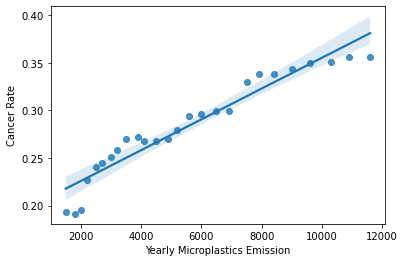

In [ ]:
sb.regplot(x=X["Yearly Microplastics Emission"], y=y)

In [9]:
female_df = pd.read_csv('female-bmi.csv')
female_df = female_df.loc[(female_df['Year'] >= 1975) & (female_df['Year'] <= 2005)]
female_df = female_df.groupby(['Year']).median()
female_df = female_df.reset_index()

In [10]:
alcohol_df = pd.read_csv('alcohol.csv')
alcohol_df = alcohol_df.loc[(alcohol_df['Year'] >= 1972) & (alcohol_df['Year'] <= 2002)]
alcohol_df = alcohol_df.groupby("Year").sum()
alcohol_df = alcohol_df.reset_index()
alcohol_df = alcohol_df.drop(columns = "Year")
alcohol_df["AlcAmt"] = alcohol_df["AlcAmt"]/2
alcohol_df.head()

,AlcAmt
0,747.230
1,784.310
2,787.020
3,796.570
4,796.565


In [11]:
smoke_df = pd.read_csv('smoke.csv')
smoke_df = smoke_df.loc[(smoke_df['Year'] >= 1972) & (smoke_df['Year'] <= 2002)]
smoke_df = smoke_df.groupby("Year").median()
smoke_df = smoke_df.reset_index()
smoke_df = smoke_df.drop(columns = "Year")
smoke_df.head()

,Cig/Adult/Day
0,6.60
1,7.15
2,7.40
3,6.95
4,7.35


In [12]:
age_df = pd.read_csv('age.csv')
age_df = age_df.loc[(age_df['Year'] >= 1980) & (age_df['Year'] <= 2010)]
age_df = age_df.reset_index()
age_df = age_df.drop(columns = ["Year", "index"])
age_df.head()         

,MedianAge
0,23.724996
1,23.907336
2,24.089675
3,24.272015
4,24.454354


In [ ]:
len(smoke_df)

In [ ]:
X = df
# X = X.reset_index().drop(columns = ["index","Year"])
X = X.reset_index().drop(columns = ["index","Year","Time"])

y = df_cancer['Cancer Rate']
y = y.reset_index().drop(columns = "index")
y = y.astype(float)

# Define the modell
X = sm.add_constant(X)
model = sm.OLS(y, X)

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

In [ ]:
X = df
# X = X.reset_index().drop(columns = ["index","Year"])
X = X.reset_index().drop(columns = ["index","Year","Time"])

# bmi df refactoring
# female_df = female_df.drop(columns = ["index", "level_0"])
female_df = female_df.reset_index()

X = pd.concat([X, female_df], axis = 1)
# X = X.drop(columns = ["Year"])
X = X.drop(columns = ["index", "Year"])

y = df_cancer['Cancer Rate']
y = y.reset_index().drop(columns = "index")
y = y.astype(float)

# Define the modell
X = sm.add_constant(X)
model = sm.OLS(y, X)

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            Cancer Rate   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     329.9
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           1.16e-17
Time:                        00:32:12   Log-Likelihood:                 84.926
No. Observations:                  26   AIC:                            -163.9
Df Residuals:                      23   BIC:                            -160.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

/Users/justinaquak/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# ------------------ Linear Regression with all the predictors ------------------

In [18]:
X = sm.add_constant(X)

from statsmodels.stats.outliers_influence import variance_inflation_factor
{X.columns[i]: variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])}

{'Yearly Microplastics Emission': 24.166241468125502,
 'AlcAmt': 2.7018321850582714,
 'Cig/Adult/Day': 4.757315803364929,
 'MedianAge': 27.961345540630646}

In [ ]:
X['Mean BMI (female)'] = np.power(X['Mean BMI (female)'],10)

In [ ]:
X['Mean BMI (female)'] = np.log10(X['Mean BMI (female)'])

In [ ]:
X = X.drop(columns = ['level_0'])

In [ ]:
X = X.drop(columns = ['MedianAge'])

In [17]:
X.head()

,Yearly Microplastics Emission,AlcAmt,Cig/Adult/Day,MedianAge
0,1400,747.230,6.60,23.724996
1,1500,784.310,7.15,23.907336
2,1800,787.020,7.40,24.089675
3,2000,796.570,6.95,24.272015
4,2200,796.565,7.35,24.454354


In [16]:
y.head()

,Cancer Rate
0,73683.6
1,75705.9
2,85086.6
3,104991.0
4,107164.2


In [15]:
X = df
# X = X.reset_index().drop(columns = ["index","Year"])
X = X.reset_index().drop(columns = ["index","Year","Time"])

# bmi df refactoring
# female_df = female_df.reset_index().drop(columns = ["index", "level_0"]) 
# female_df = female_df.reset_index()
 
# X = pd.concat([X, bmi_df, alcohol_df], axis = 1) 
# X = pd.concat([X, female_df, alcohol_df, smoke_df], axis = 1)
# X = pd.concat([X, female_df, alcohol_df, smoke_df, age_df], axis = 1)
X = pd.concat([X, alcohol_df, smoke_df, age_df], axis = 1)
# X = X.drop(columns = [ "Year"])

y = df_cancer['Cancer Rate']
y = y.reset_index().drop(columns = "index")
y = y.astype(float)

In [37]:
# Define the modell
X = sm.add_constant(X)
model = sm.OLS(y, X)

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            Cancer Rate   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     801.5
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           8.22e-27
Time:                        12:29:40   Log-Likelihood:                -313.54
No. Observations:                  31   AIC:                             637.1
Df Residuals:                      26   BIC:                             644.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

(array([2., 1., 5., 3., 5., 0., 3., 7., 2., 3.]),
 array([-11647.02712929,  -9449.77827889,  -7252.5294285 ,  -5055.2805781 ,
         -2858.03172771,   -660.78287731,   1536.46597309,   3733.71482348,
          5930.96367388,   8128.21252427,  10325.46137467]),
 <a list of 10 Patch objects>)

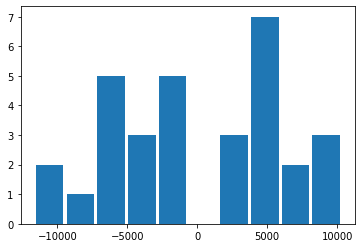

In [43]:
plt.hist(model_fit.resid, rwidth= 0.9)

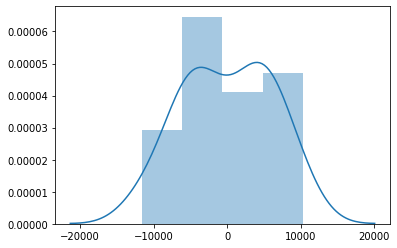

In [39]:
sb.distplot(model_fit.resid)

In [30]:
st.diagnostic.kstest_normal(model_fit.resid)[1]

0.2

In [34]:
sp.kstest(model_fit.resid,'norm')

KstestResult(statistic=0.5161290322580645, pvalue=3.372474647763268e-08)

In [44]:
sp.shapiro(model_fit.resid)

(0.9618242979049683, 0.32580500841140747)

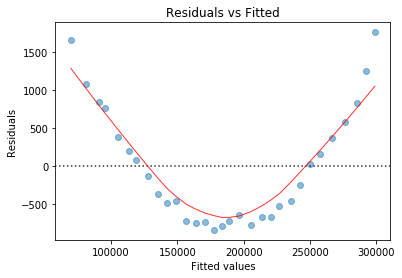

In [20]:
# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sb.residplot(model_fitted_y, df.columns[-1], data=df,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

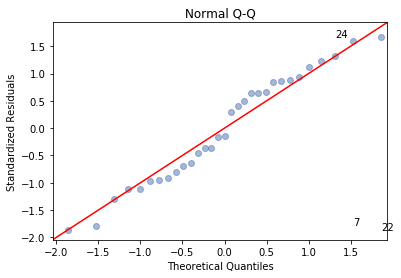

In [23]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

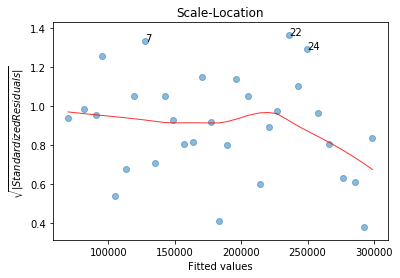

In [24]:
plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sb.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_norm_residuals_abs_sqrt[i]));

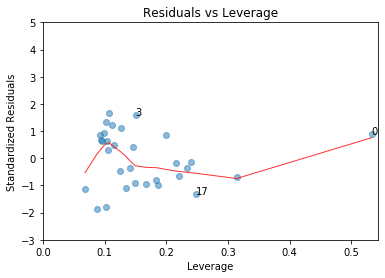

In [25]:
plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sb.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]));

In [ ]:
X = X.drop(columns = "const")
new = pd.DataFrame()
new = pd.concat([X, y], axis = 1)
new.corr()

In [ ]:
X.columns

In [ ]:
sb.regplot(y=X["Yearly Microplastics Emission"], x=df_cancer["Year"])

In [ ]:
sb.regplot(y=y, x=df_cancer["Year"])